In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
import spacy
from tqdm import tqdm

In [2]:
spacyNLP = spacy.load('de')

def no_sentences(text):
    doc = spacyNLP(text)
    return len(list(doc.sents))

In [7]:
df_normal = pd.read_csv("datasets/08_SyntaxComplexity/01_Preprocessing_df.csv", sep="|", lineterminator = '\n')
df_normal["noSentences"] = [no_sentences(text) for text in tqdm(df_normal["cleanedText"])]

groupedDF = df_normal.groupby("newLevel").mean()
print("Average number of sentences per text in the original data set")
groupedDF["noSentences"].head()

100%|██████████| 2563/2563 [02:37<00:00, 16.28it/s]

Average number of sentences per text in the original data set


newLevel
A    11.687398
B    18.581869
C    26.867872
L    29.217105
Name: noSentences, dtype: float64

In [8]:
df_normal = df_normal.fillna(0)
df_normal = df_normal[df_normal["newLevel"] != "L"]
df_normal = df_normal[df_normal["Type"] == "Writing"]
level = df_normal.groupby('newLevel')
df_normal = level.apply(lambda x: x.sample(level.size().min()).reset_index(drop=True))
print("Number of Text in the original dataframe")
level.count()["Level"].head()

Number of Text in the original dataframe


newLevel
A     547
B    1040
C     719
Name: Level, dtype: int64

B    1605
A    1605
C    1605
Name: newLevel, dtype: int64


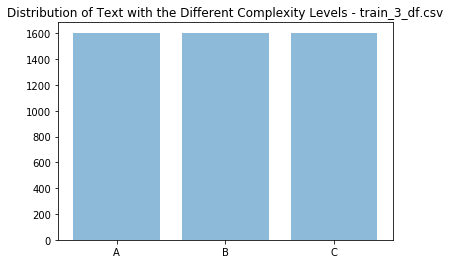

B    963
A    963
C    963
Name: newLevel, dtype: int64


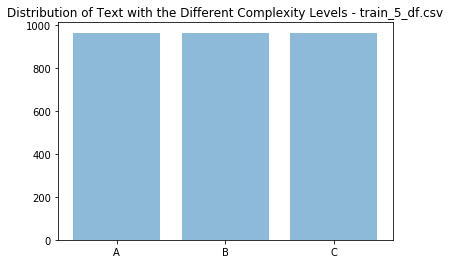

B    687
A    687
C    687
Name: newLevel, dtype: int64


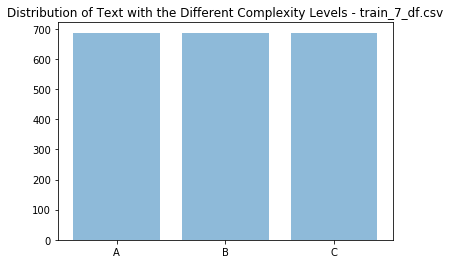

B    481
A    481
C    481
Name: newLevel, dtype: int64


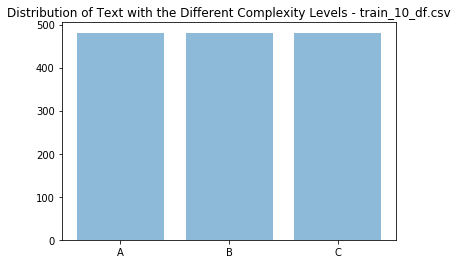

B    535
A    535
C    535
Name: newLevel, dtype: int64


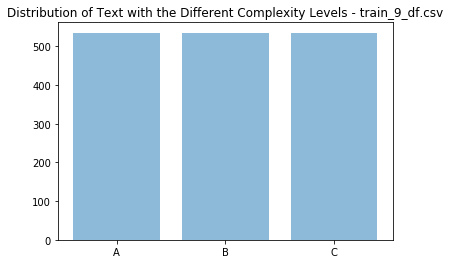

B    601
A    601
C    601
Name: newLevel, dtype: int64


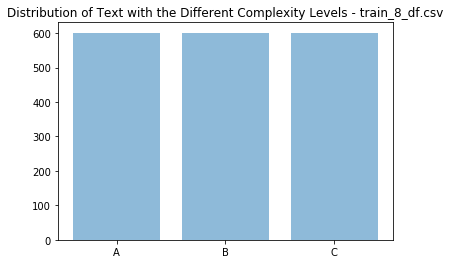

B    1203
A    1203
C    1203
Name: newLevel, dtype: int64


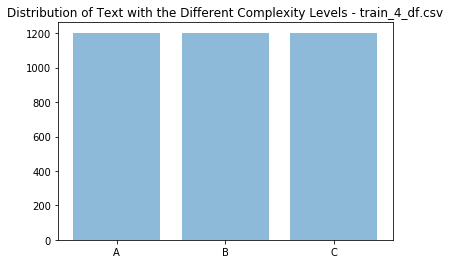

B    401
A    401
C    401
Name: newLevel, dtype: int64


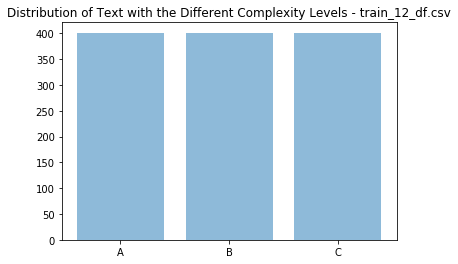

B    370
A    370
C    370
Name: newLevel, dtype: int64


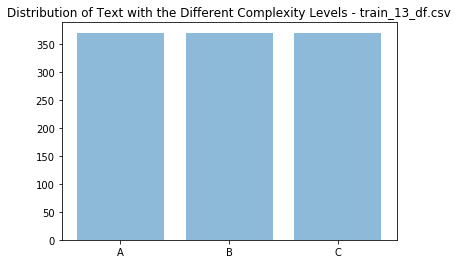

B    321
A    321
C    321
Name: newLevel, dtype: int64


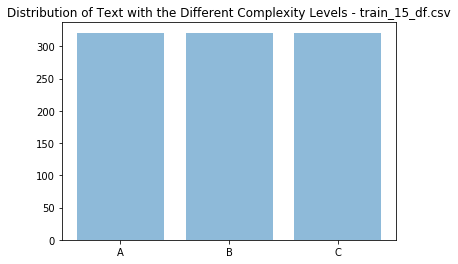

A    4815
B    4815
C    4815
Name: newLevel, dtype: int64


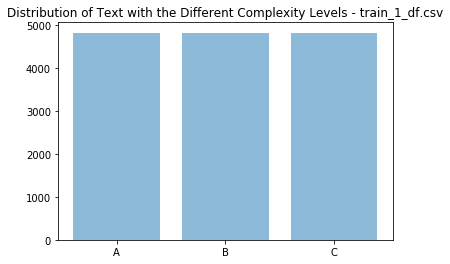

B    802
A    802
C    802
Name: newLevel, dtype: int64


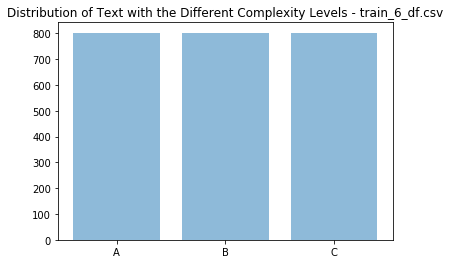

B    343
A    343
C    343
Name: newLevel, dtype: int64


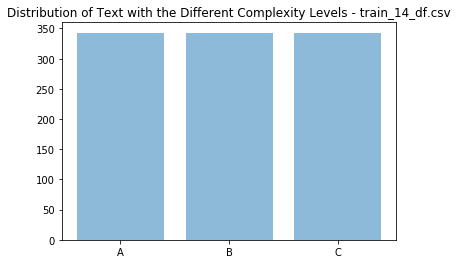

B    437
A    437
C    437
Name: newLevel, dtype: int64


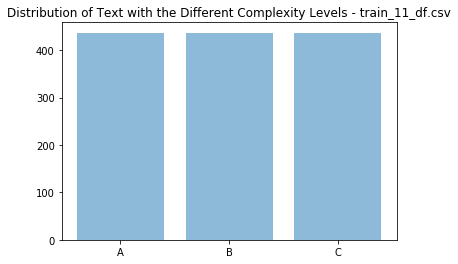

B    2407
C    2407
A    2407
Name: newLevel, dtype: int64


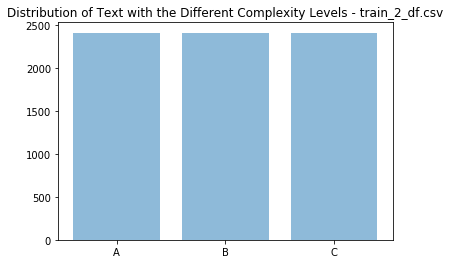

In [12]:
input_files = os.listdir("/home/soeren/Documents/TextDifficultyAssessmentGerman/datasets/08_SyntaxComplexity")
input_files = [input_file for input_file in input_files if "train" in input_file]

for input_file in input_files:
    df = pd.read_csv("datasets/08_SyntaxComplexity/" + input_file, sep="|", lineterminator = '\n')
    df_count= df['newLevel'].value_counts()
    print(df_count)
    
    plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
    plt.title("Distribution of Text with the Different Complexity Levels - " + input_file)
    plt.show()

In [20]:
features = [columnName for columnName in text_normalizedDF._get_numeric_data().columns if not columnName.startswith("RF") and not columnName.startswith("SE") and not columnName in ["Title", "noSentences"]]
print(features)

text_df = pd.read_csv("datasets/08_SyntaxComplexity/01_Preprocessing_df.csv", sep="|", lineterminator = '\n')
text_df = text_df.fillna(0)

text_normalizedDF = text_df
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(text_normalizedDF[features]) 
text_normalizedDF[features] = scaled_values

trainDF, testDF = train_test_split(text_normalizedDF, test_size=0.33)



X_train = trainDF[features]
y_train = trainDF["newLevel"]

X_test = testDF[features]
y_test = testDF["newLevel"]

clf = LinearSVC().fit(X_train, y_train)
score = clf.score(X_test, y_test)

print("=== Score on Text Dataset: " + str(score))

for input_file in input_files:
    df = pd.read_csv("datasets/08_SyntaxComplexity/" + input_file, sep="|", lineterminator = '\n')
    df = df.fillna(0)
    
    scaled_values = scaler.transform(df[features])
    df[features] = scaled_values
    
    X = df[features]
    y = df["newLevel"]
    score = clf.score(X, y)
    print("=== Score on " + input_file + ": " + str(score))

['BF-average_sentence_length', 'BF-average_syllable_word', 'BF-Flesch_Reading_Ease_Score', 'BF-Flesch_Kincaid_readability', 'BF-percentag_hard_words', 'BF-fog', 'BF-polysyllable_count', 'BF-smog', 'BF-average_character_per_word', 'BF-text_length', 'LD-ttr', 'LD-root_ttr', 'LD-corrected_ttr', 'LD-log_ttr', 'LD-uber_index', 'LD-yule_s_k', 'LD-mtld', 'LD-hdd', 'LV-lexical_density', 'LV-lexical_word_variation', 'LV-noun_variation', 'LV-adj_variation', 'LV-adv_variation', 'LV-modifier_variation', 'LV-verb_variation1', 'LV-verb_variation2', 'LV-squared_verb_variation', 'LV-corrected_verb_variation', 'LV-verb_token_ratio', 'LV-noun_token_ratio', 'LV-verb_noun_token_ratio', 'FF-meanFreq', 'FF-medianFreq', 'FF-bin0', 'FF-bin1', 'FF-bin2', 'FF-bin3', 'FF-bin4', 'FF-bin5', 'FF-bin6', 'FF-bin7', 'FF-bin8', 'FF-bin9', 'FF-bin10', 'FF-bin11', 'FF-bin12', 'FF-bin13', 'FF-bin14', 'MO-1', 'MO-2', 'MO-3', 'MO-ART', 'MO-Acc', 'MO-Comp', 'MO-Dat', 'MO-Gen', 'MO-Ind', 'MO-Nom', 'MO-Past', 'MO-Pl', 'MO-Pres

In [21]:
def plot_coefficients(classifier, feature_names, top_features=20):
    #function that plots the important coefficient for each class in a classifier
    #
    #param classifier:     classifier used
    #param feature_names:  list of feature names
    #param top_features:   numer of features on the graph
    #
    #return:               one graph for each class
    
    for stars, coef in zip(["A", "B", "C"], [coefs.ravel() for coefs in classifier.coef_]):
        top_positive_coefficients = np.argsort(coef)[-top_features:]
        top_negative_coefficients = np.argsort(coef)[:top_features]
        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
        plt.figure(figsize=(15, 1))
        colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
        plt.title("Top features for categorizing Level " + stars + " Text")
        feature_names = np.array(feature_names)
        plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
        plt.show()

['BF-average_sentence_length', 'BF-average_syllable_word', 'BF-Flesch_Reading_Ease_Score', 'BF-Flesch_Kincaid_readability', 'BF-percentag_hard_words', 'BF-fog', 'BF-polysyllable_count', 'BF-smog', 'BF-average_character_per_word', 'BF-text_length', 'LD-ttr', 'LD-root_ttr', 'LD-corrected_ttr', 'LD-log_ttr', 'LD-uber_index', 'LD-yule_s_k', 'LD-mtld', 'LD-hdd', 'LV-lexical_density', 'LV-lexical_word_variation', 'LV-noun_variation', 'LV-adj_variation', 'LV-adv_variation', 'LV-modifier_variation', 'LV-verb_variation1', 'LV-verb_variation2', 'LV-squared_verb_variation', 'LV-corrected_verb_variation', 'LV-verb_token_ratio', 'LV-noun_token_ratio', 'LV-verb_noun_token_ratio', 'FF-meanFreq', 'FF-medianFreq', 'FF-bin0', 'FF-bin1', 'FF-bin2', 'FF-bin3', 'FF-bin4', 'FF-bin5', 'FF-bin6', 'FF-bin7', 'FF-bin8', 'FF-bin9', 'FF-bin10', 'FF-bin11', 'FF-bin12', 'FF-bin13', 'FF-bin14', 'MO-1', 'MO-2', 'MO-3', 'MO-ART', 'MO-Acc', 'MO-Comp', 'MO-Dat', 'MO-Gen', 'MO-Ind', 'MO-Nom', 'MO-Past', 'MO-Pl', 'MO-Pres

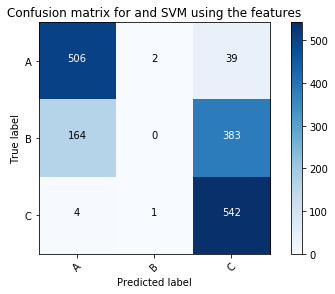

===== 2 ====


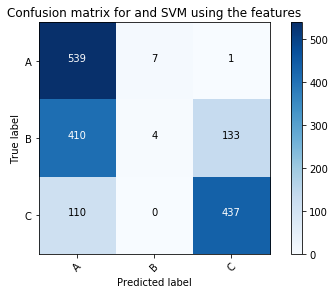

===== 3 ====


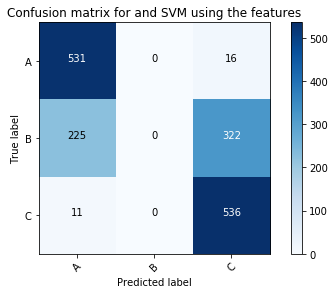

===== 4 ====


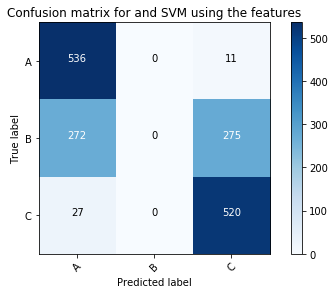

===== 5 ====


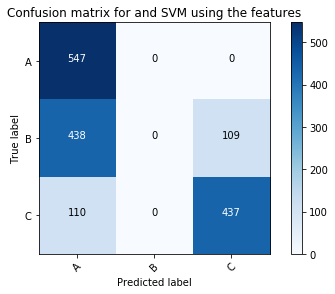

===== 6 ====


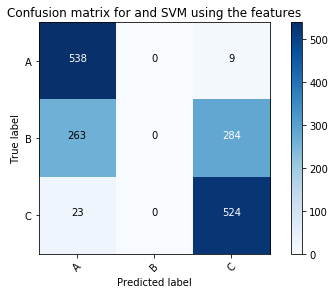

===== 7 ====


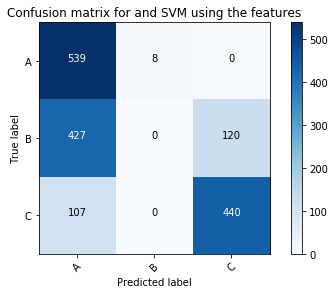

===== 8 ====


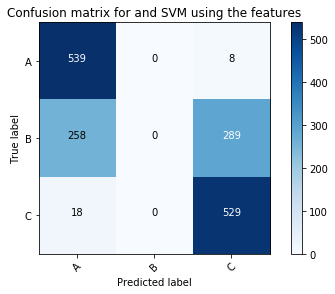

===== 9 ====


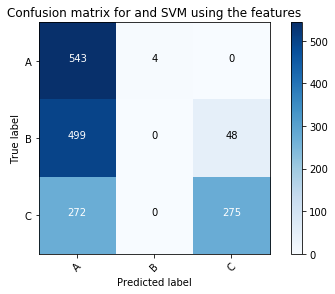

===== 10 ====


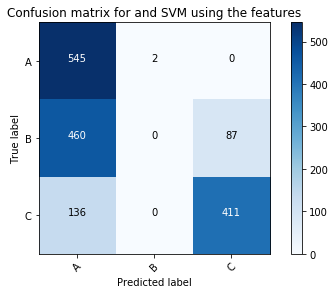

===== 11 ====


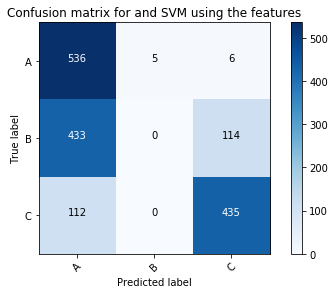

===== 12 ====


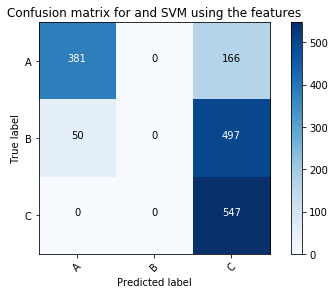

===== 13 ====


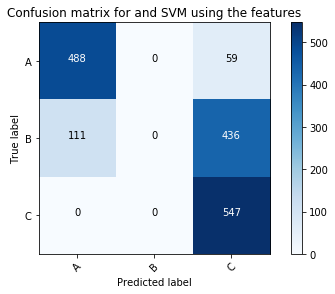

===== 14 ====


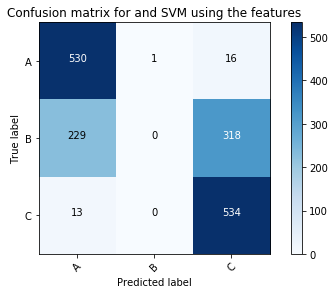

===== 15 ====


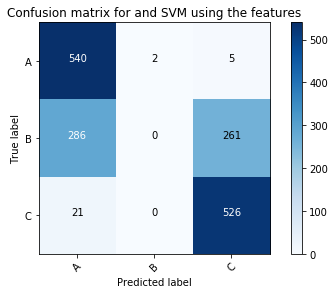

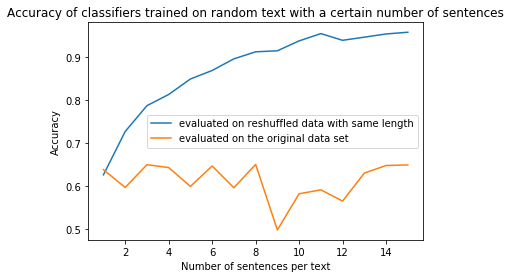

In [24]:
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix

numbers = range(1,16)
scores = []
normalScores = []

features = [columnName for columnName in df_normal._get_numeric_data().columns if not columnName.startswith("RF") and not columnName.startswith("SE") and not columnName in ["Title", "noSentences"]]
print(features)

for number in numbers:
    print("===== " + str(number) + " ====")
    trainDF = pd.read_csv("datasets/08_SyntaxComplexity/train_"+str(number)+"_df.csv", sep="|", lineterminator = '\n')
    trainDF = trainDF.fillna(0)

    testDF = pd.read_csv("datasets/08_SyntaxComplexity/test_"+str(number)+"_df.csv", sep="|", lineterminator = '\n')
    testDF = testDF.fillna(0)
    
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(trainDF[features]) 
    trainDF[features] = scaled_values
    
    scaled_values = scaler.transform(testDF[features]) 
    testDF[features] = scaled_values
    
    X_test = testDF[features]
    y_test = testDF["newLevel"]
    
    X_train = trainDF[features]
    y_train = trainDF["newLevel"]
    
    clf = LinearSVC().fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    scores.append(score)
    
    
    X_normal = df_normal[features]
    y_normal = df_normal["newLevel"]
    y_normal_pred= clf.predict(X_normal)

    score = clf.score(X_normal, y_normal)
    normalScores.append(score)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_normal, y_normal_pred)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["A", "B", "C"],
                          title=str('Confusion matrix for and SVM using the features'))

    plt.show()
    
    #plot_coefficients(clf, features, top_features=20)
    
plt.plot(numbers, scores, label="evaluated on reshuffled data with same length")
plt.plot(numbers, normalScores, label="evaluated on the original data set")
plt.xlabel("Number of sentences per text")
plt.ylabel("Accuracy")
plt.title("Accuracy of classifiers trained on random text with a certain number of sentences")
plt.legend()
plt.show()

===== 1 ====


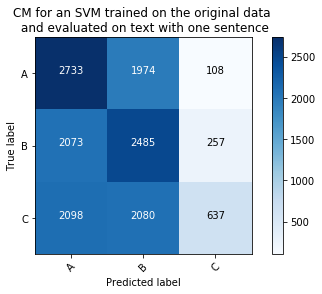

===== 2 ====


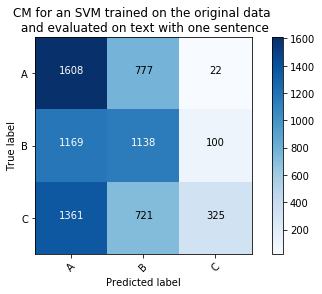

===== 3 ====


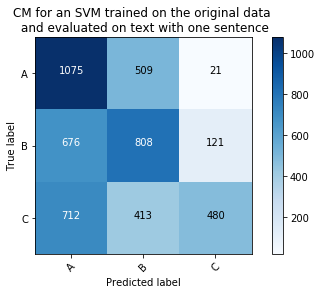

===== 4 ====


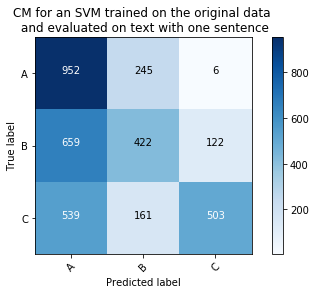

===== 5 ====


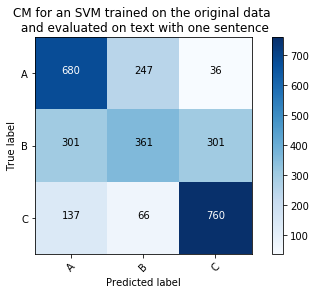

===== 6 ====


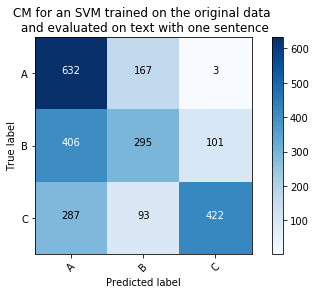

===== 7 ====


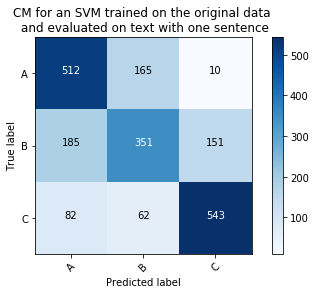

===== 8 ====


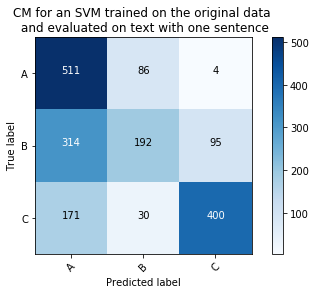

===== 9 ====


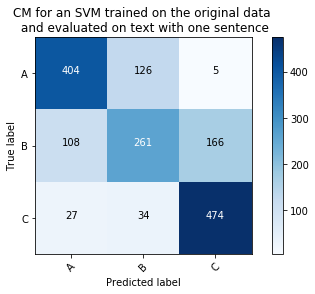

===== 10 ====


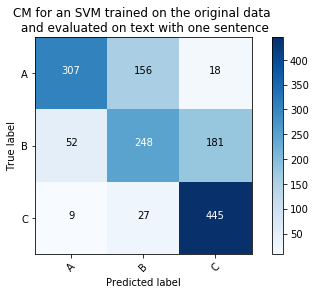

===== 11 ====


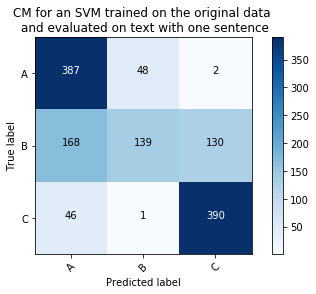

===== 12 ====


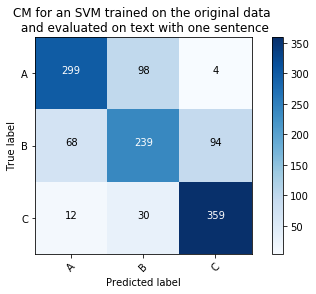

===== 13 ====


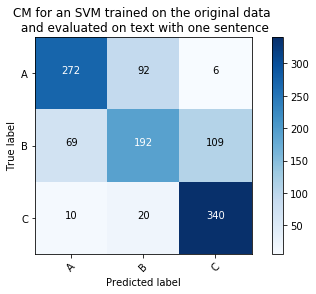

===== 14 ====


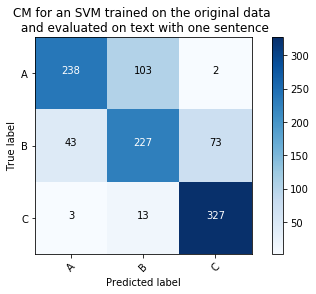

===== 15 ====


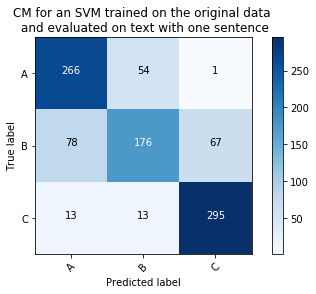

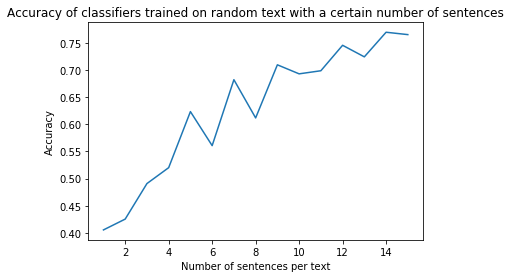

In [23]:
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix

numbers = range(1,16)
scores = []
normalScores = []

X_normal = df_normal[features]
y_normal = df_normal["newLevel"]
clf = LinearSVC().fit(X_normal, y_normal)

for number in numbers:
    print("===== " + str(number) + " ====")
    trainDF = pd.read_csv("datasets/08_SyntaxComplexity/train_"+str(number)+"_df.csv", sep="|", lineterminator = '\n')
    trainDF = trainDF.fillna(0)
    
    testDF = pd.read_csv("datasets/08_SyntaxComplexity/test_"+str(number)+"_df.csv", sep="|", lineterminator = '\n')
    testDF = testDF.fillna(0)
    
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(trainDF[features]) 
    trainDF[features] = scaled_values
    
    scaled_values = scaler.transform(testDF[features]) 
    testDF[features] = scaled_values
    
    X_test = testDF[features]
    y_test = testDF["newLevel"]
    
    X_train = trainDF[features]
    y_train = trainDF["newLevel"]
    
    score = clf.score(X_train, y_train)
    scores.append(score)
    
    y_pred = clf.predict(X_train)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_train, y_pred)
    np.set_printoptions(precision=2)
    
    #Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["A", "B", "C"],
                         title=str('CM for an SVM trained on the original data \n and evaluated on text with one sentence'))

    plt.show()
    
    #plot_coefficients(clf, features, top_features=20)
    
plt.plot(numbers, scores)
plt.xlabel("Number of sentences per text")
plt.ylabel("Accuracy")
plt.title("Accuracy of classifiers trained on random text with a certain number of sentences")
plt.show()

In [25]:
X_normal = df_normal[features]
y_normal = df_normal["newLevel"]
clfNormal = LinearSVC().fit(X_normal, y_normal)

trainDF = pd.read_csv("datasets/08_SyntaxComplexity/train_15_df.csv", sep="|", lineterminator = '\n')
trainDF = trainDF.fillna(0)
X_train = trainDF[features]
y_train = trainDF["newLevel"]
clfReshuffled = LinearSVC().fit(X_train, y_train)

In [26]:
from sklearn.feature_selection import RFE

svc = LinearSVC()

rfe = RFE(svc, 1, step=5)
rfe.fit(X_normal, y_normal)
print(np.array(features)[rfe.support_])
sortedTop = [x for _,x in sorted(zip(rfe.ranking_, features))]
print("Top features of classifier trained on the original text: " + str(sortedTop))

['MO-ART']
Top features of classifier trained on the original text: ['MO-ART', 'BF-percentag_hard_words', 'MO-Nom', 'FF-bin0', 'FF-bin4', 'LV-adv_variation', 'MO-3', 'SC-sein_haben_ratio', 'FF-bin13', 'FF-bin7', 'MO-Dat', 'MO-imp2verbs', 'SC-av_num_dep_clauses_per_clause', 'LD-ttr', 'LV-verb_variation1', 'MO-Gen', 'MO-acc2nouns', 'MO-finverbs2verbs', 'LV-modifier_variation', 'MO-Ind', 'MO-Past', 'MO-Sg', 'MO-part2verbs', 'FF-bin9', 'LV-noun_variation', 'LV-verb_token_ratio', 'MO-inf2verbs', 'MO-nom2nouns', 'FF-bin8', 'MO-2nd2finverbs', 'MO-dat2nouns', 'SC-av_inter_clause_per_sentence', 'SC-av_non_terminals_per_word', 'FF-bin14', 'FF-bin6', 'LD-hdd', 'LV-verb_variation2', 'MO-Pl', 'MO-1', 'MO-1st2finverbs', 'MO-Pres', 'SC-av_inter_clause_per_clause', 'SC-av_num_dep_clauses_per_sentence', 'FF-bin12', 'LV-adj_variation', 'LV-lexical_density', 'MO-subj2finverbs', 'SD-avg_no_dep_noun_exc_mod', 'LV-corrected_verb_variation', 'LV-verb_noun_token_ratio', 'MO-3rd2finverbs', 'SC-av_num_clauses_p

In [27]:
svc = LinearSVC()

rfe = RFE(svc, 1, step=5)
rfe.fit(X_train, y_train)
print(np.array(features)[rfe.support_])
sortedTop = [x for _,x in sorted(zip(rfe.ranking_, features))]
print("Top features of classifier trained on the reshuffled texts: " + str(sortedTop))

['MO-gen2nouns']
Top features of classifier trained on the reshuffled texts: ['MO-gen2nouns', 'MO-Sg', 'SC-av_num_dep_clauses_per_clause', 'MO-1st2finverbs', 'MO-2nd2finverbs', 'MO-Pl', 'MO-part2verbs', 'SC-av_non_terminals_per_word', 'BF-average_character_per_word', 'SC-av_inter_clause_per_sentence', 'SC-av_num_dep_clauses_per_sentence', 'SD-avg_no_dep_noun_inc_mod', 'SD-avg_no_words_head_dep', 'BF-Flesch_Kincaid_readability', 'BF-smog', 'FF-meanFreq', 'FF-medianFreq', 'MO-3rd2finverbs', 'BF-Flesch_Reading_Ease_Score', 'BF-polysyllable_count', 'MO-1', 'MO-compounds2nouns', 'SD-avg_no_dep_noun_exc_mod', 'BF-average_syllable_word', 'LD-uber_index', 'MO-verbspersent', 'SC-av_non_terminals_per_sentence', 'SD-avg_no_dep_verb_exc_mod', 'LV-lexical_word_variation', 'MO-nom2nouns', 'SC-av_clause_length', 'SC-no_passives', 'SD-avg_no_dep_verb_inc_mod', 'BF-text_length', 'LV-noun_variation', 'MO-ART', 'MO-acc2nouns', 'MO-finverbs2verbs', 'LV-adv_variation', 'LV-squared_verb_variation', 'MO-subj

In [106]:
for featureName, dif, normal, reshuffled  in zip(features+features+features, list(abs(clfNormal.coef_ - clfReshuffled.coef_).flatten()), list(clfNormal.coef_.flatten()), list(clfReshuffled.coef_.flatten())):
    print(dif, ",", featureName, ",",normal, ",",reshuffled)

0.12585687687715105 , BF-average_sentence_length , -0.12884946184303525 , -0.002992584965884206
0.035810539538130466 , BF-average_syllable_word , 0.04152953305874626 , 0.00571899352061579
0.016070421521707873 , BF-Flesch_Reading_Ease_Score , 0.04366721990257084 , 0.05973764142427871
0.17010411725418406 , BF-Flesch_Kincaid_readability , 0.19833513463785324 , 0.028231017383669187
0.004901564010556196 , BF-percentag_hard_words , 0.005004979031111503 , 0.00010341502055530689
0.04838212514663816 , BF-fog , -0.04953779312476971 , -0.0011556679781315545
0.019528858582281088 , BF-polysyllable_count , -0.014796846338418048 , -0.034325704920699134
0.09380199672678763 , BF-smog , 0.10733415277635366 , 0.013532156049566039
0.030876999010673645 , BF-average_character_per_word , -0.025091772916725135 , 0.005785226093948508
0.05057472568918192 , BF-text_length , 0.00568595120091847 , -0.04488877448826345
0.008119620512152141 , LD-ttr , 0.012790920709137765 , 0.004671300196985623
0.005250687662601705 